In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
(train_X,train_y),(test_X,test_y)=cifar10.load_data()

In [3]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

IndexError: index 1 is out of bounds for axis 0 with size 0

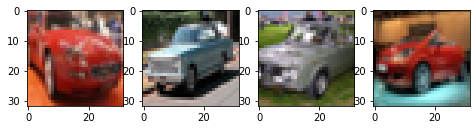

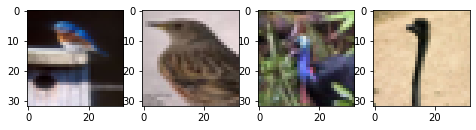

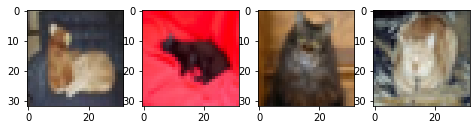

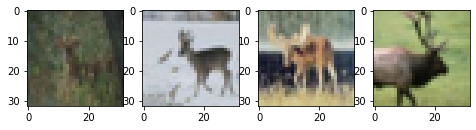

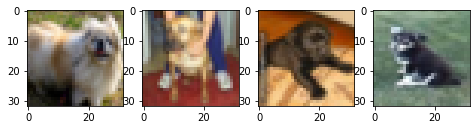

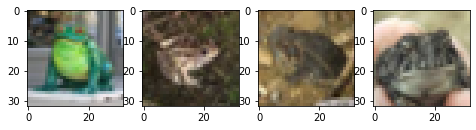

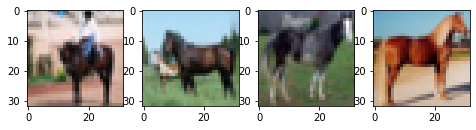

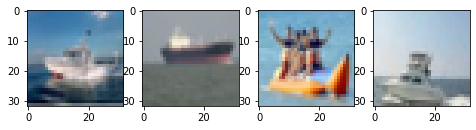

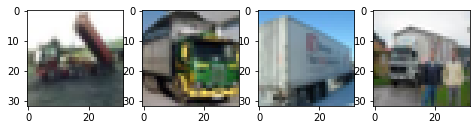

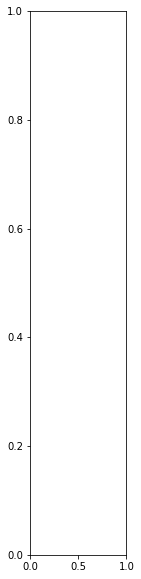

In [4]:
for n in range(1,11):
    ind=np.where(train_y==n)
    sample_x=train_X[ind[0]]
    plt.figure(figsize=[10,10])
    for c in range(1,5):
        ax=plt.subplot(1,5,c)
        ax.imshow(sample_x[c])

In [5]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential

from keras.layers import Dense,Dropout,Conv2D, MaxPooling2D,Flatten

In [6]:
train_y_enc,test_y_enc= to_categorical(train_y),to_categorical(test_y)

In [8]:
train_y_enc.shape,test_y_enc.shape

((50000, 10), (10000, 10))

In [9]:
train_X, test_X=train_X.reshape(-1,32,32,3),test_X.reshape(-1,32,32,3)

In [10]:
model=Sequential()


In [11]:
from keras.optimizers import Adam

In [12]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(loss='catagorical_crossentropy', metrics='accuracy',optimizer=Adam(0.01))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [15]:
history=model.fit(train_X ,train_y_enc ,validation_data=(test_X ,test_y_enc) ,epochs=5 ,batch_size=32)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\losses.py", line 2367, in get
        return deserialize(identifier)
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: catagorical_crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
